In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('data/playtennis.csv')
df.head()


,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [3]:
df.dtypes  

outlook     object
temp        object
humidity    object
windy         bool
play        object
dtype: object

In [4]:
df.play.unique()

array(['no', 'yes'], dtype=object)

In [5]:
df.isnull().sum()

outlook     0
temp        0
humidity    0
windy       0
play        0
dtype: int64

In [6]:
X = df.iloc[:,:-1]   
X


,outlook,temp,humidity,windy
0,sunny,hot,high,False
1,sunny,hot,high,True
2,overcast,hot,high,False
3,rainy,mild,high,False
4,rainy,cool,normal,False
5,rainy,cool,normal,True
6,overcast,cool,normal,True
7,sunny,mild,high,False
8,sunny,cool,normal,False
9,rainy,mild,normal,False


In [7]:
y = df.play

In [8]:
y

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
14    yes
15    yes
16     no
17     no
18     no
19     no
Name: play, dtype: object

In [9]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X, y)

ValueError: could not convert string to float: 'sunny'

In [10]:
from sklearn.preprocessing import LabelEncoder

def labelEncode(data, columns):
    for i in columns:
#         print(i)
        lb = LabelEncoder().fit_transform(data[i])
        data[i + '_'] = lb

columns = ['outlook','temp','humidity','windy']
labelEncode(df, columns)

In [11]:
df

,outlook,temp,humidity,windy,play,outlook_,temp_,humidity_,windy_
0,sunny,hot,high,False,no,2,1,0,0
1,sunny,hot,high,True,no,2,1,0,1
2,overcast,hot,high,False,yes,0,1,0,0
3,rainy,mild,high,False,yes,1,2,0,0
4,rainy,cool,normal,False,yes,1,0,1,0
5,rainy,cool,normal,True,no,1,0,1,1
6,overcast,cool,normal,True,yes,0,0,1,1
7,sunny,mild,high,False,no,2,2,0,0
8,sunny,cool,normal,False,yes,2,0,1,0
9,rainy,mild,normal,False,yes,1,2,1,0


In [12]:
y_le = LabelEncoder()
y = y_le.fit_transform(df.play)
df['play_'] = y
df

,outlook,temp,humidity,windy,play,outlook_,temp_,humidity_,windy_,play_
0,sunny,hot,high,False,no,2,1,0,0,0
1,sunny,hot,high,True,no,2,1,0,1,0
2,overcast,hot,high,False,yes,0,1,0,0,1
3,rainy,mild,high,False,yes,1,2,0,0,1
4,rainy,cool,normal,False,yes,1,0,1,0,1
5,rainy,cool,normal,True,no,1,0,1,1,0
6,overcast,cool,normal,True,yes,0,0,1,1,1
7,sunny,mild,high,False,no,2,2,0,0,0
8,sunny,cool,normal,False,yes,2,0,1,0,1
9,rainy,mild,normal,False,yes,1,2,1,0,1


In [13]:
X = df[['outlook_','temp_','humidity_', 'windy_']]  # or X = df.iloc[:,5:-1]
X[:5]

,outlook_,temp_,humidity_,windy_
0,2,1,0,0
1,2,1,0,1
2,0,1,0,0
3,1,2,0,0
4,1,0,1,0


In [14]:
y

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0])

In [15]:
class_names = list(y_le.classes_)  
class_names

['no', 'yes']

In [16]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X, y)

DecisionTreeClassifier()

In [17]:
data = [[1,2,0,0]]
y_predict = model.predict(data)

prd = class_names[y_predict[0]]
print('Result : {}'. format(prd))

Result : yes


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


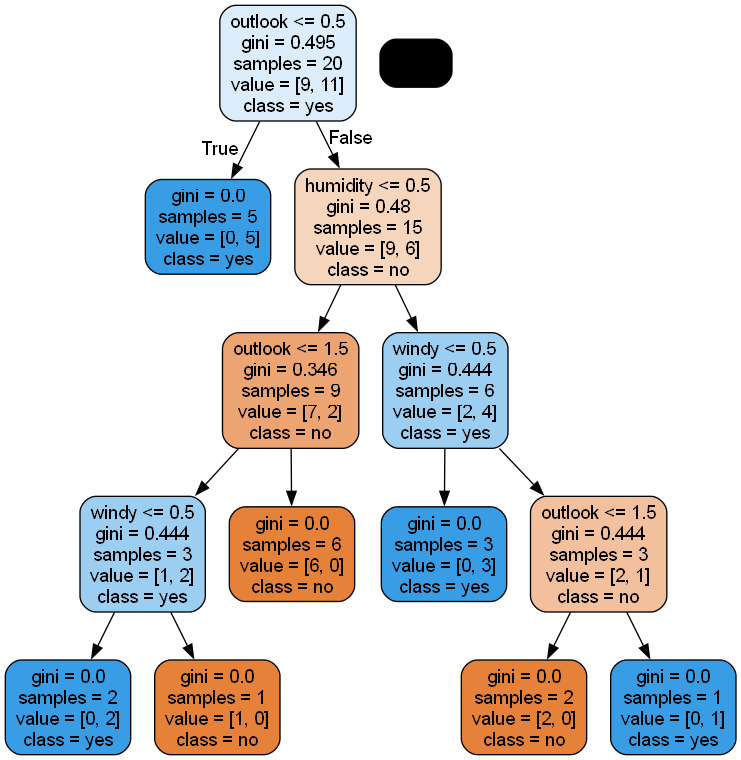

In [18]:
data_feature_names = 'outlook','temp','humidity', 'windy'

import pydotplus

from sklearn.tree import export_graphviz
from IPython.display import Image

dot_data = export_graphviz(model, out_file=None, 
                           feature_names=data_feature_names,  
                           class_names=class_names, # 
                           filled=True,
                           rounded=True)


graph = pydotplus.graph_from_dot_data(dot_data)  # Draw graph
Image(graph.create_png())  # Show graph                

In [19]:
# df = pd.read_csv('data/playtennis-wtest.csv')

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2) 

In [22]:
print('Total X: {}'. format(len(X)))
print('Total train: {}'. format(len(X_train)))
print('Total test: {}'. format(len(X_test)))
X_test

Total X: 20
Total train: 16
Total test: 4


,outlook_,temp_,humidity_,windy_
0,2,1,0,0
19,2,1,0,1
3,1,2,0,0
16,2,2,0,0


In [23]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_predict

array([0, 0, 1, 0])

In [24]:
y_test

array([0, 0, 1, 0])

In [25]:
print('Accuracy %: {:.2f}'.format(accuracy_score(y_test, y_predict) * 100))

Accuracy %: 100.00
